In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
file_path = './5_plots_web_scrapping/02_Charts/01_Data for plots/Meteo data.csv'

In [56]:
df = pd.read_csv(file_path, sep=';', decimal='.')

In [57]:
df.head(5)

,Station code,Station name,Year,Month,Day,Average daily temperature,Average daily relative humidity,Average daily wind speed [m/s],Average daily cloud cover [oktas]
0,252200150,WARSZAWA-BIELANY,2020,1,1,2.4,89.5,5.0,8.0
1,252200150,WARSZAWA-BIELANY,2020,1,2,1.3,77.5,3.3,7.0
2,252200150,WARSZAWA-BIELANY,2020,1,3,2.3,75.3,3.7,5.3
3,252200150,WARSZAWA-BIELANY,2020,1,4,3.3,84.0,5.0,6.7
4,252200150,WARSZAWA-BIELANY,2020,1,5,0.7,79.5,3.3,0.7


In [58]:
# A list containing the starting days for the months
months_change = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

# A list containing the names of the months
months_names = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Dataset containing 12 values: average for monthly measurements
df_month_avg = df.groupby('Month')[[
        'Average daily temperature', 'Average daily relative humidity',
        'Average daily wind speed [m/s]', 'Average daily cloud cover [oktas]'
]].mean()
 
df_month_avg.columns = [
        'Average temperature', 'Average relative humidity',
        'Average wind speed [m/s]', 'Average total cloud cover [oktas]'
]

In [59]:
df_month_avg.head(5)

,Average temperature,Average relative humidity,Average wind speed [m/s],Average total cloud cover [oktas]
Month,,,,
1,2.890323,84.838710,3.374194,6.145161
2,4.293103,78.124138,3.417241,5.606897
3,5.067742,61.983871,2.967742,4.503226
4,9.570000,50.206667,2.870000,2.953333
5,12.109677,65.329032,2.580645,4.912903


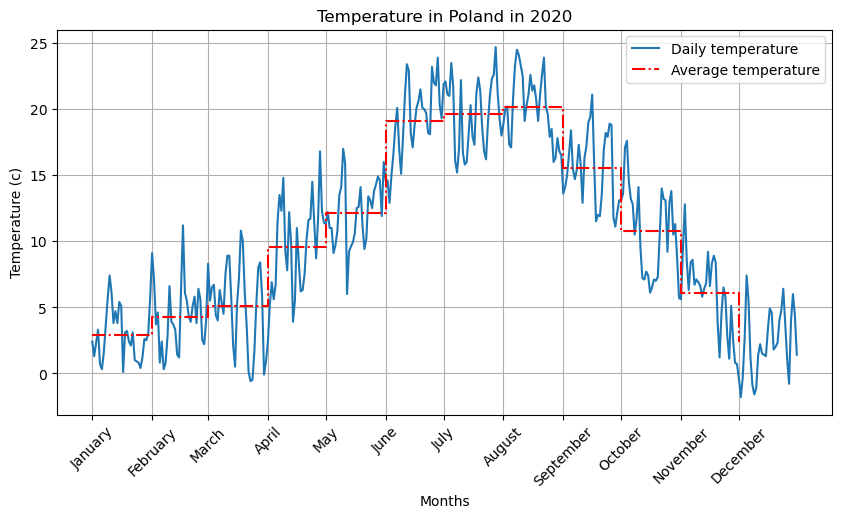

In [60]:

plt.figure(figsize=(10,5))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.plot(months_change, df_month_avg['Average temperature'], '-.r', label='Average temperature', drawstyle='steps-post')
plt.xticks(ticks=months_change, labels=months_names, rotation=45)
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
plt.title("Temperature in Poland in 2020")
plt.legend()
plt.grid()
plt.show()

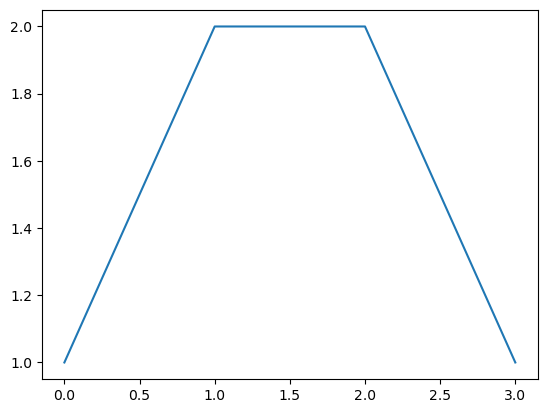

In [61]:
# simple line plot - we only pass the parameter with y-axis values
plt.plot([1,2,2,1])
plt.show()

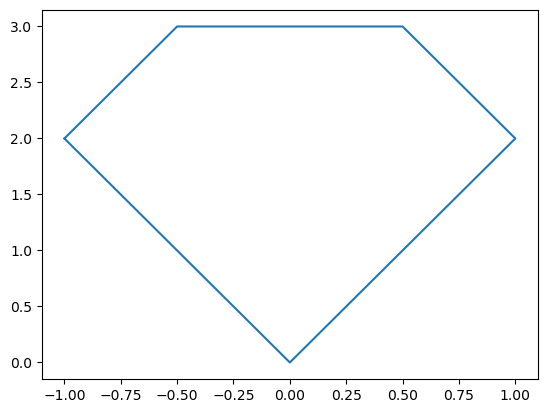

In [62]:
# diamond shape - we pass 2 lists that specify the x and y coordinates for each point
plt.plot([-1, -0.5 , 0.5, 1, 0, -1], [2, 3, 3, 2, 0, 2])
plt.show()

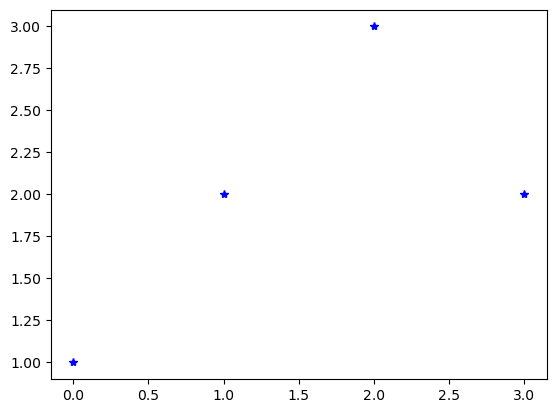

In [63]:
plt.plot([1,2,3,2], '* b') # blue stars not connected by a line
plt.show()

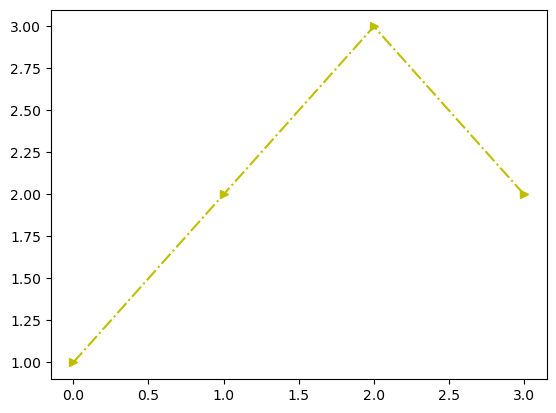

In [64]:
plt.plot([1,2,3,2], '>-.y') # yellow triangles (pointing right) connected with a dash-dot line
plt.show()

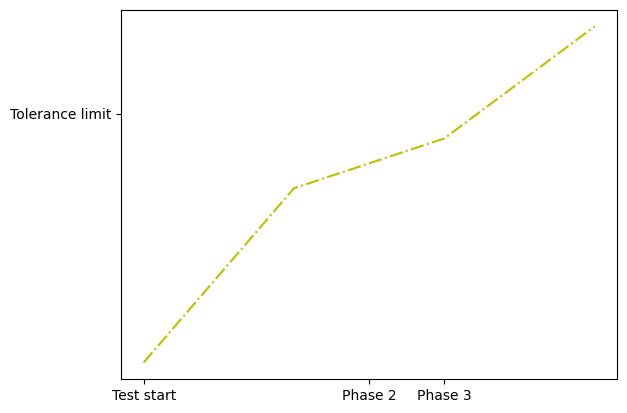

In [65]:
plt.plot([0,1.4,1.8,2.7], '-.y')
plt.xticks(ticks=[0, 1.5, 2],
           labels=['Test start', 'Phase 2', 'Phase 3'])
plt.yticks(ticks=[2],
           labels=['Tolerance limit'])
plt.show()

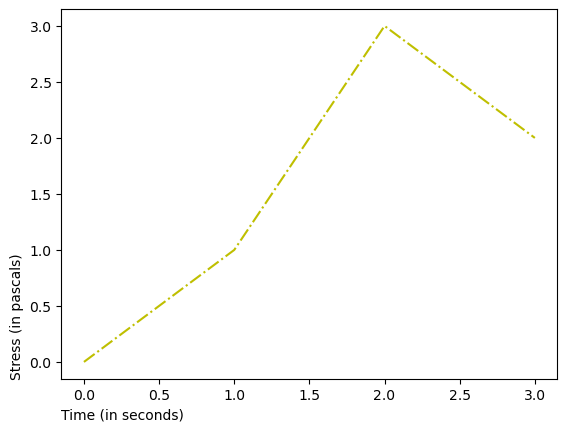

In [66]:
plt.plot([0,1,3,2], '-.y')
plt.ylabel(ylabel='Stress (in pascals)', loc='bottom')
plt.xlabel(xlabel='Time (in seconds)', loc='left')
plt.show()

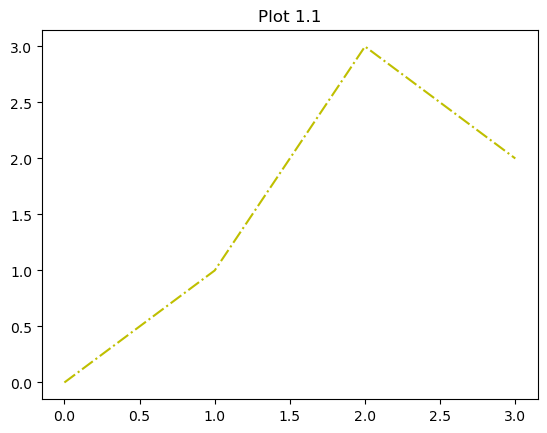

In [67]:
plt.plot([0,1,3,2], '-.y')
plt.title('Plot 1.1')
plt.show()

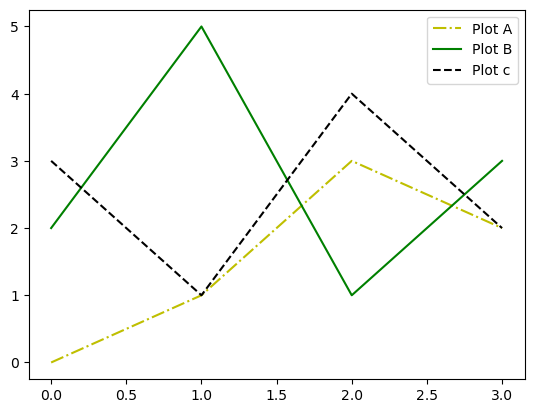

In [68]:
plt.plot([0,1,3,2], '-.y', label='Plot A')
plt.plot([2,5,1,3], '-g', label='Plot B')
plt.plot([3,1,4,2], '--k', label='Plot c')
plt.legend()
plt.show()

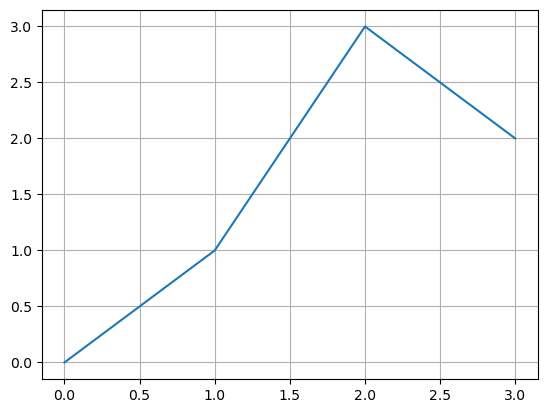

In [69]:
plt.plot([0,1,3,2])
plt.grid()
plt.show()

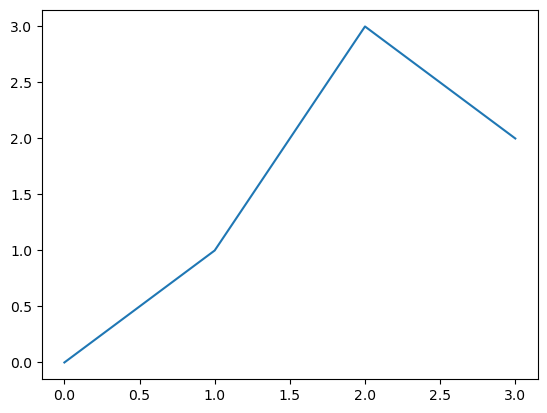

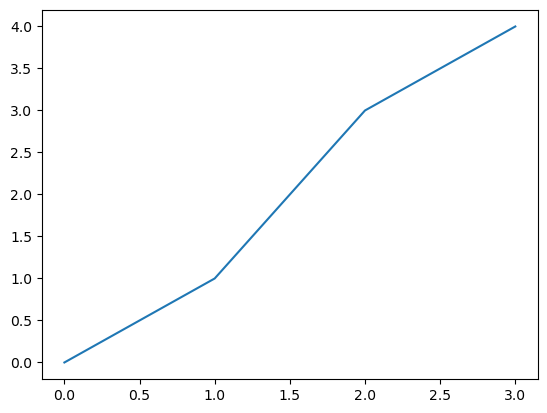

In [70]:
plt.plot([0,1,3,2])
plt.show()
plt.plot([0,1,3,4])
plt.show()

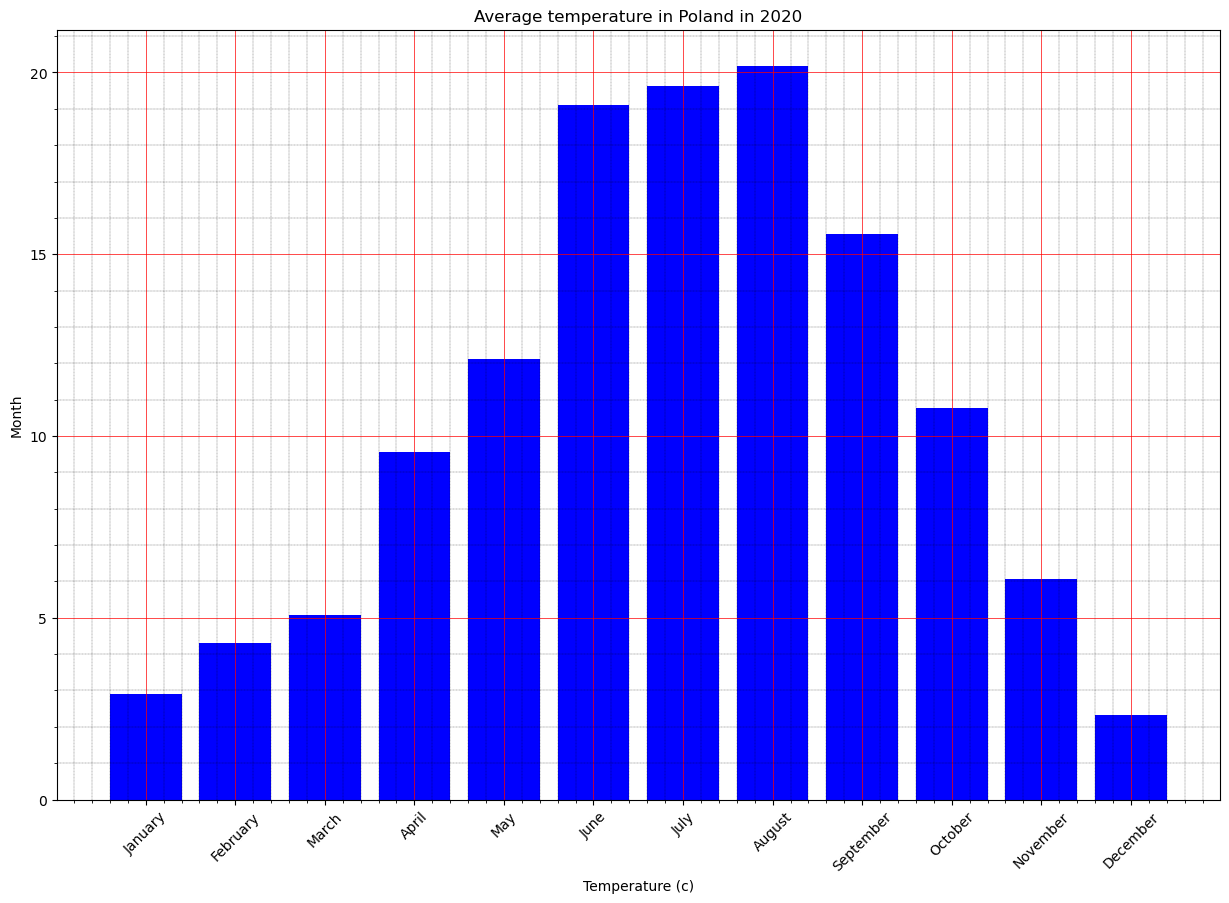

In [71]:
plt.figure(figsize=(15,10))
 
plt.bar(range(1, 13), df_month_avg['Average temperature'], color='blue')
 
plt.xticks(range(1, 13), months_names, rotation=45)
plt.yticks(range(0, 25, 5))
 
plt.title('Average temperature in Poland in 2020')
 
plt.ylabel('Month')
plt.xlabel('Temperature (c)')
 
plt.minorticks_on()
 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle='--', linewidth='0.2', color='black')
plt.show()

In [72]:
df_nice_days = df.loc[df['Average daily cloud cover [oktas]'] <= 4]
df_bad_days = df.loc[df['Average daily cloud cover [oktas]'] > 4]
 
s_nice_days_per_month = df_nice_days.groupby('Month').size()
s_bad_days_per_month = df_bad_days.groupby('Month').size()

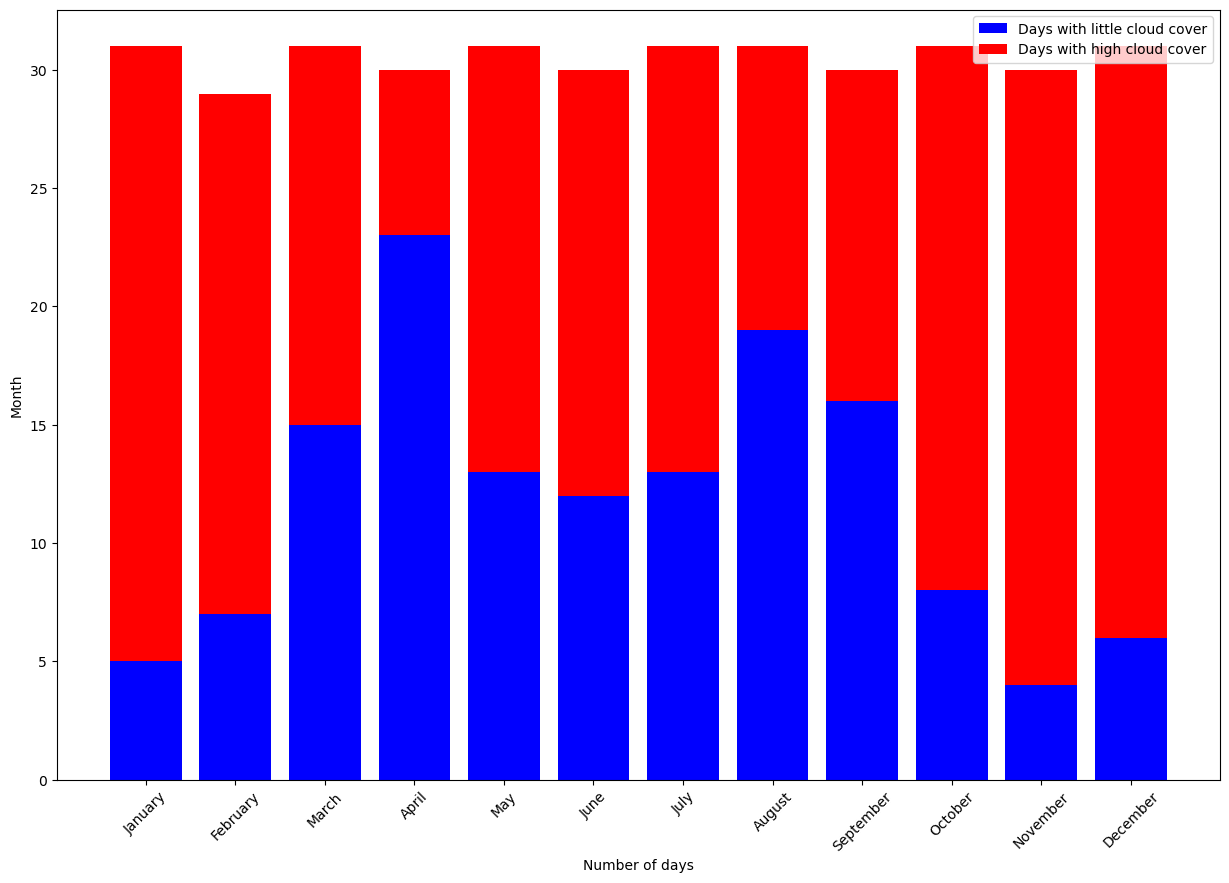

In [73]:
plt.figure(figsize=(15,10))
 
plt.bar(range(1, 13), s_nice_days_per_month, color='blue',
        label='Days with little cloud cover')
plt.bar(range(1, 13), s_bad_days_per_month, color='red',
        bottom=s_nice_days_per_month, label='Days with high cloud cover')
 
plt.xticks(range(1, 13), months_names, rotation=45)
 
plt.ylabel('Month')
plt.xlabel('Number of days')
 
plt.legend()
plt.show()

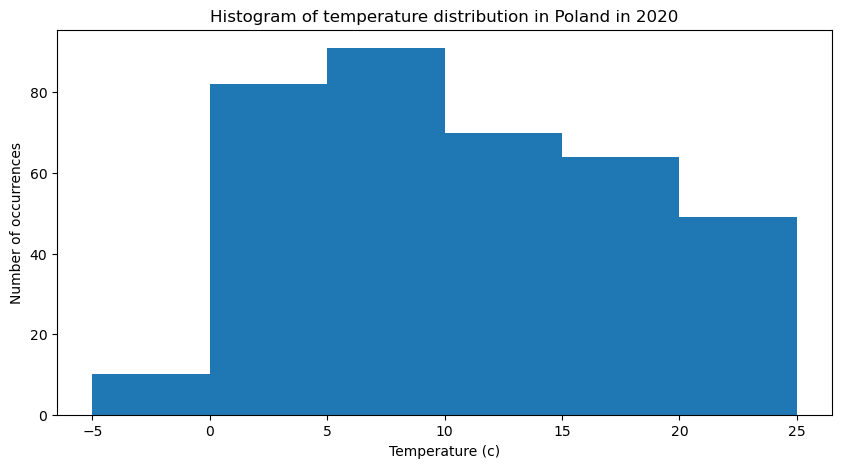

In [74]:
plt.figure(figsize=(10,5))
 
x = plt.hist(df['Average daily temperature'],bins=range(-5,30,5))
plt.ylabel('Number of occurrences')
plt.xlabel('Temperature (c)')
plt.title('Histogram of temperature distribution in Poland in 2020')
plt.show()

In [75]:
bins = [0, 20, 40, 60, 80, 100]
s = pd.cut(df['Average daily relative humidity'], bins=bins).value_counts()

([<matplotlib.patches.Wedge at 0x1e9a5b5ab70>,
 [Text(0.26183663209801866, 1.0683826927143507, '80%-100%'),
  Text(-0.9148244123100591, -0.7765927469668741, '60%-80%'),
  Text(0.8262450682291332, -0.7261673961470834, '40%-60%'),
  Text(1.0951003648576172, -0.10370723643369403, '20%-40%'),
  Text(1.0999999999999963, -9.011575352898976e-08, '0-20%')],
 [Text(0.1428199811443738, 0.5827541960260094, '42.3%'),
  Text(-0.5336475738475344, -0.4530124357306765, '37.7%'),
  Text(0.45067912812498173, -0.39609130698931816, '16.9%'),
  Text(0.5973274717405184, -0.056567583509287644, '3.0%'),
  Text(0.599999999999998, -4.915404737944895e-08, '0.0%')])

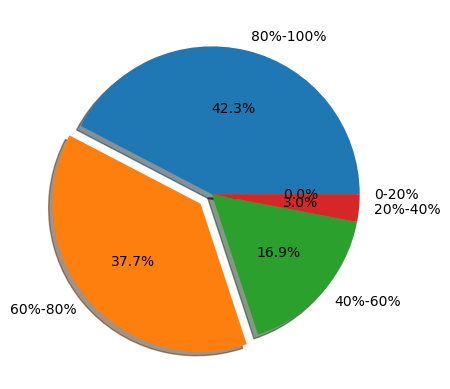

In [76]:
plt.pie(s, labels=['80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%'],
explode = [0, 0.1, 0, 0, 0], autopct='%1.1f%%', shadow=True)

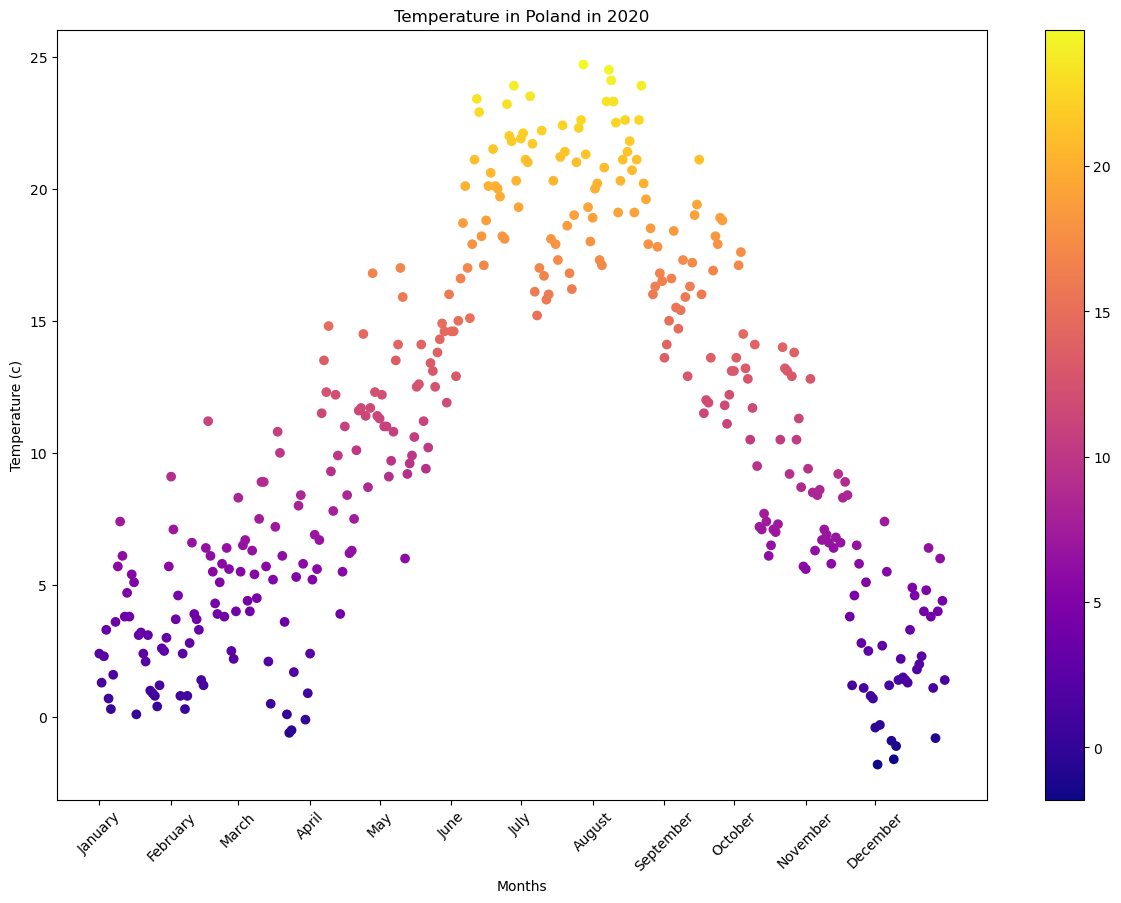

In [89]:
plt.figure(figsize=(15,10))
 
plt.scatter(df.index, df['Average daily temperature'],
            c=df['Average daily temperature'], cmap='plasma')
 
plt.xticks(months_change, months_names, rotation=45)
 
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
 
plt.colorbar()  # method that displays a color map next to the plot (if used)
 
plt.title("Temperature in Poland in 2020")
plt.show()

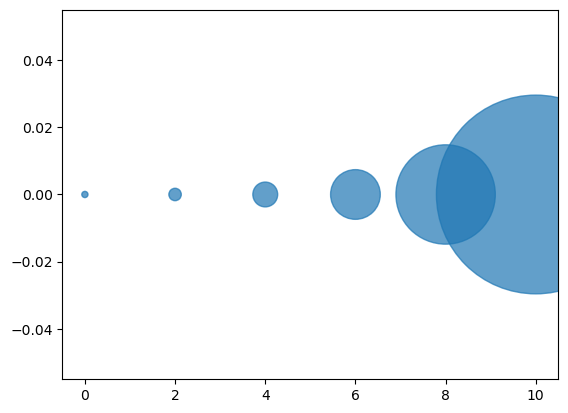

In [90]:
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*4**n for n in range(len(x))]
 
plt.scatter(x, y, s=s, alpha=0.7)
plt.show()
plt.show()

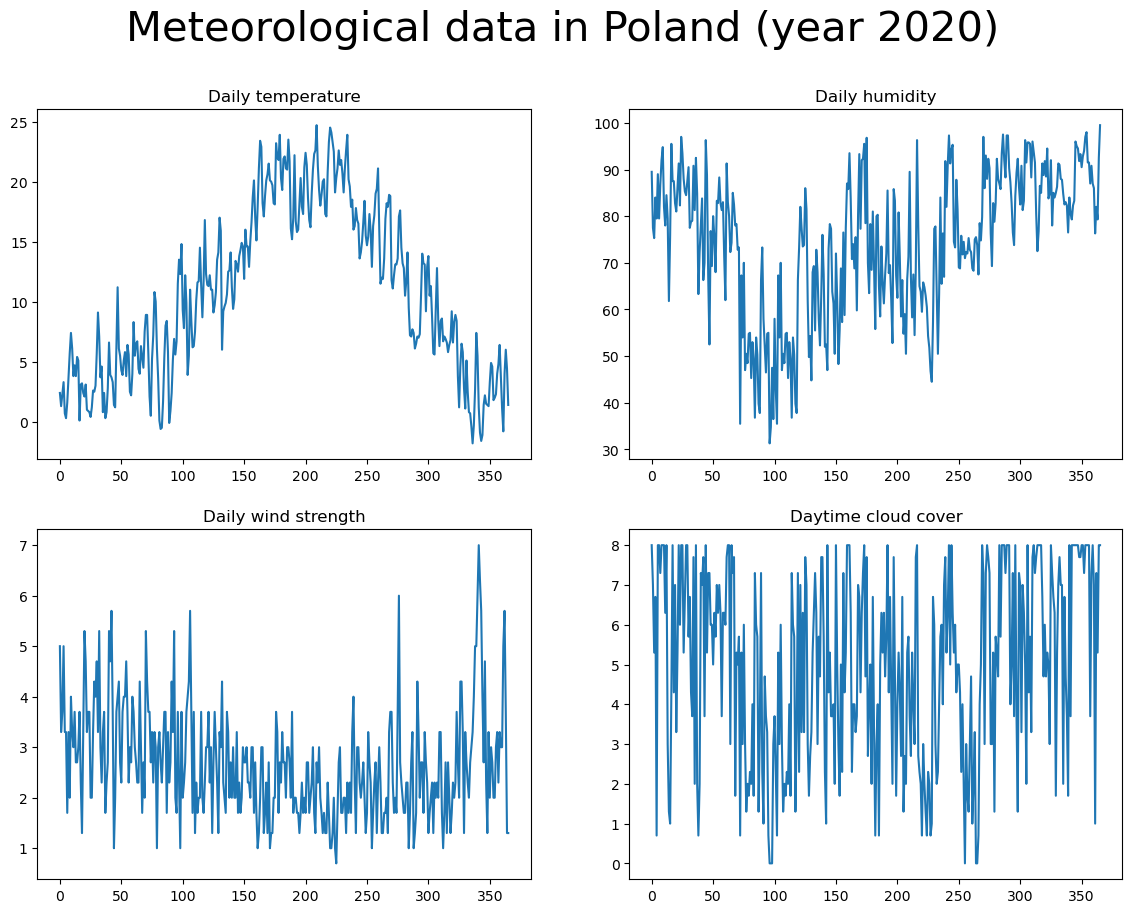

In [91]:
plt.figure(figsize=(14, 10))
 
plt.subplot(2,2,1) # We set the first plot as the active plot.
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.title('Daily temperature')
 
plt.subplot(2,2,2) # We set the second plot as the active plot
plt.plot(df['Average daily relative humidity'], label='Daily humidity')
plt.title('Daily humidity')
 
plt.subplot(2,2,3)  # Set the third plot as the active plot
plt.plot(df['Average daily wind speed [m/s]'], label='Daily wind strength')
plt.title('Daily wind strength')
 
plt.subplot(2,2,4) # We set the fourth plot as the active plot
plt.plot(df['Average daily cloud cover [oktas]'], label='Daily cloud cover')
plt.title('Daytime cloud cover')
 
plt.suptitle("Meteorological data in Poland (year 2020)", fontsize= 30) 
plt.show()

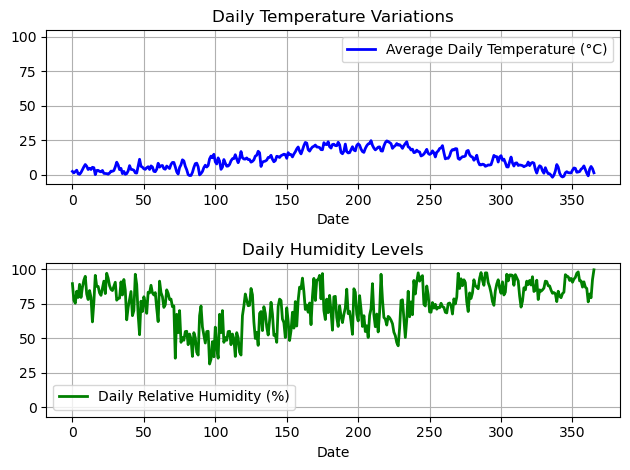

In [97]:
ax1 = plt.subplot(2, 1, 1)
plt.plot(df['Average daily temperature'], label='Average Daily Temperature (°C)', color='blue', linewidth=2)
plt.title("Daily Temperature Variations")
plt.grid(True)
plt.legend()
plt.xlabel('Date')

plt.subplot(2, 1, 2, sharey=ax1)
plt.plot(df['Average daily relative humidity'], label='Daily Relative Humidity (%)', color='green', linewidth=2)
plt.title("Daily Humidity Levels")
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

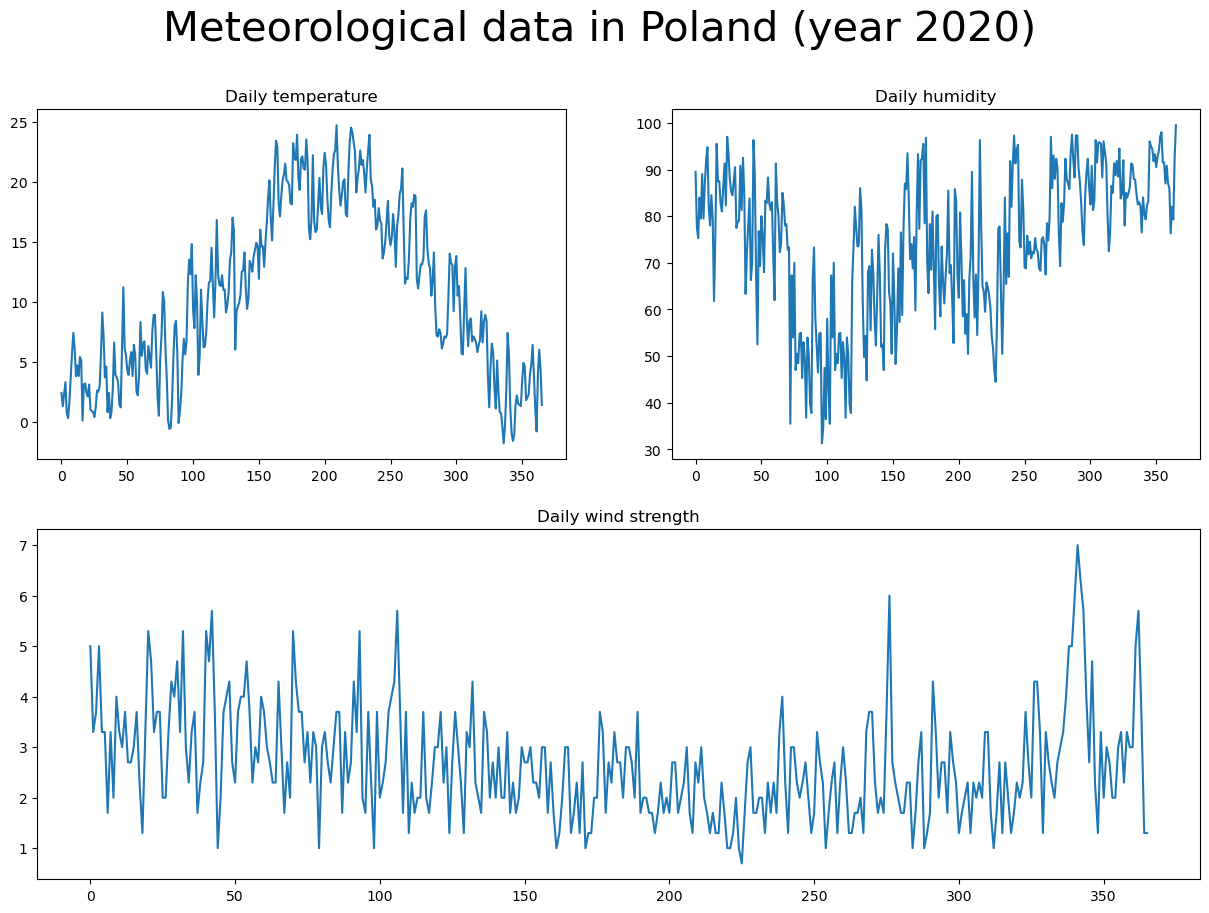

In [98]:
plt.figure(figsize=(15,10))
plt.subplot2grid((2,2),(0,0))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.title("Daily temperature")
 
plt.subplot2grid((2,2),(0,1))
plt.plot(df['Average daily relative humidity'], label='Daily humidity')
plt.title("Daily humidity")
 
plt.subplot2grid((2,2),(1,0), colspan=2)
plt.plot(df['Average daily wind speed [m/s]'], label='Daily wind strength')
plt.title("Daily wind strength")
 
plt.suptitle("Meteorological data in Poland (year 2020)", fontsize= 30)
plt.show()


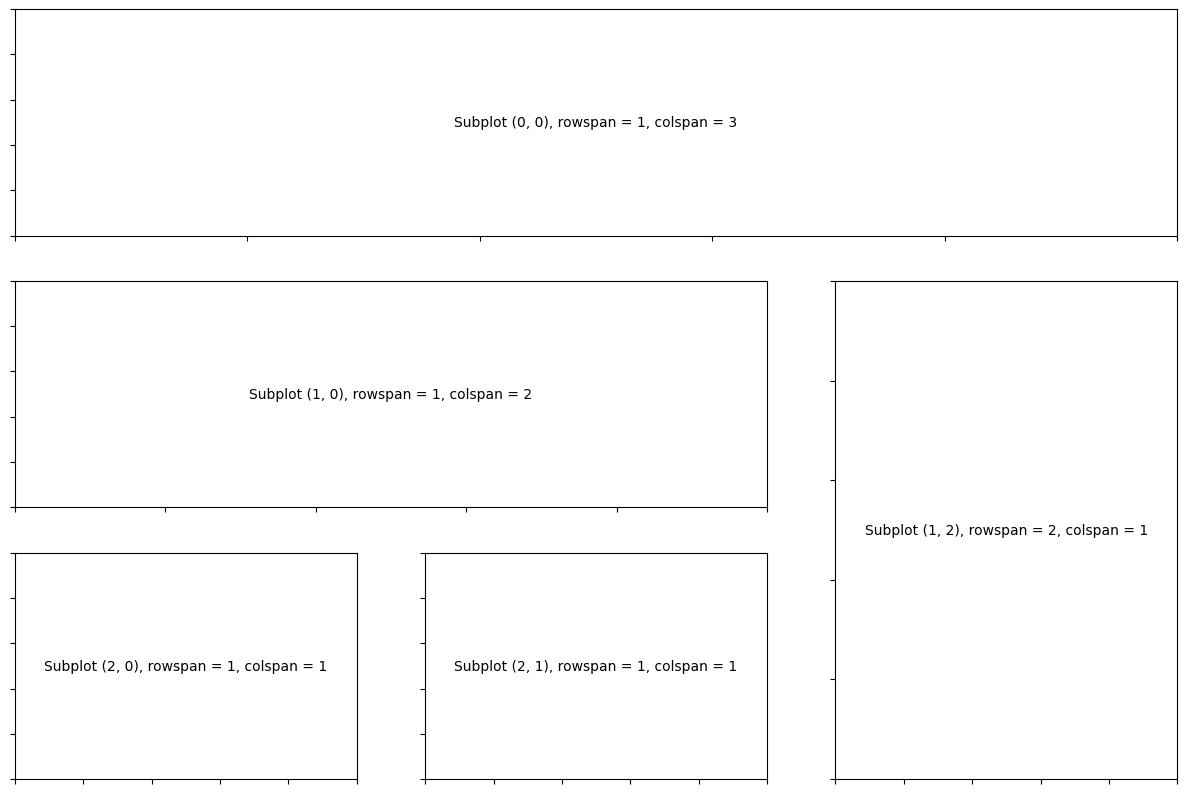

In [82]:
def write_info(x, y, colspan, rowspan):
    plt.text(0.5, 0.5, f"Subplot ({x}, {y}), rowspan = {rowspan}, colspan = {colspan}", va="center", ha="center")
    plt.tick_params(labelbottom=False, labelleft=False)
 
plt.figure(figsize=(15,10))
plt.subplot2grid((3, 3), (0, 0), colspan=3)
write_info(0, 0, 3, 1)
 
plt.subplot2grid((3, 3), (1, 0), colspan=2)
write_info(1, 0, 2, 1)
 
plt.subplot2grid((3, 3), (1, 2), rowspan=2)
write_info(1, 2, 1, 2)
 
plt.subplot2grid((3, 3), (2, 0))
write_info(2, 0, 1, 1)
 
plt.subplot2grid((3, 3), (2, 1))
write_info(2, 1, 1, 1)
plt.show()

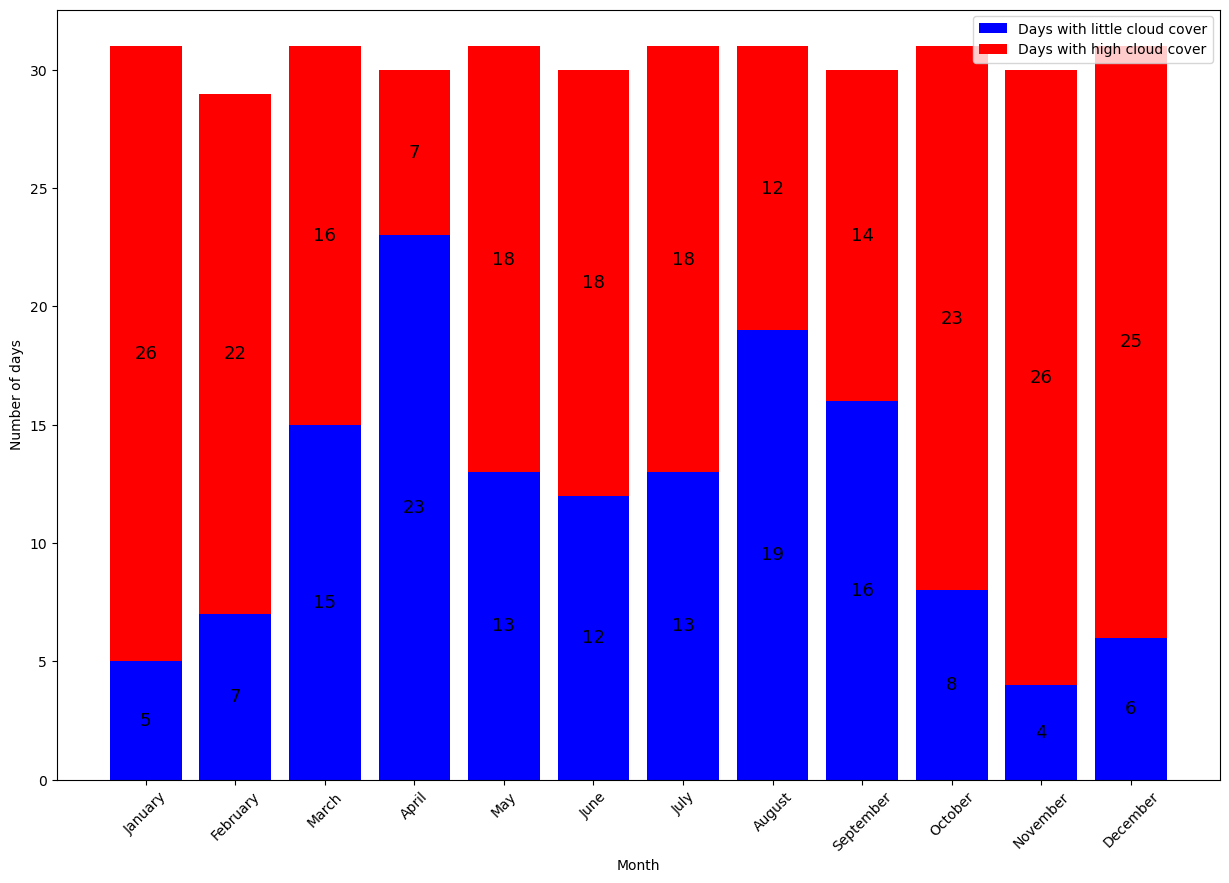

In [83]:
plt.figure(figsize=(15,10))
plt.bar(range(1, 13), s_nice_days_per_month, color='blue', label="Days with little cloud cover")
plt.bar(range(1, 13), s_bad_days_per_month, color='red', bottom=s_nice_days_per_month, label="Days with high cloud cover")
plt.xticks(range(1, 13), months_names, rotation=45)
plt.ylabel('Number of days')
plt.xlabel('Month')
plt.legend()
 
for i in range(0, 12):
    plt.text(i+1, s_nice_days_per_month.iloc[i] / 2, f"{s_nice_days_per_month.iloc[i]}", ha = 'center', va = 'center', fontsize = 13)
    plt.text(i+1, s_nice_days_per_month.iloc[i] + (s_bad_days_per_month.iloc[i] / 2), f"{s_bad_days_per_month.iloc[i]}", ha = 'center', va = 'center', fontsize = 13)

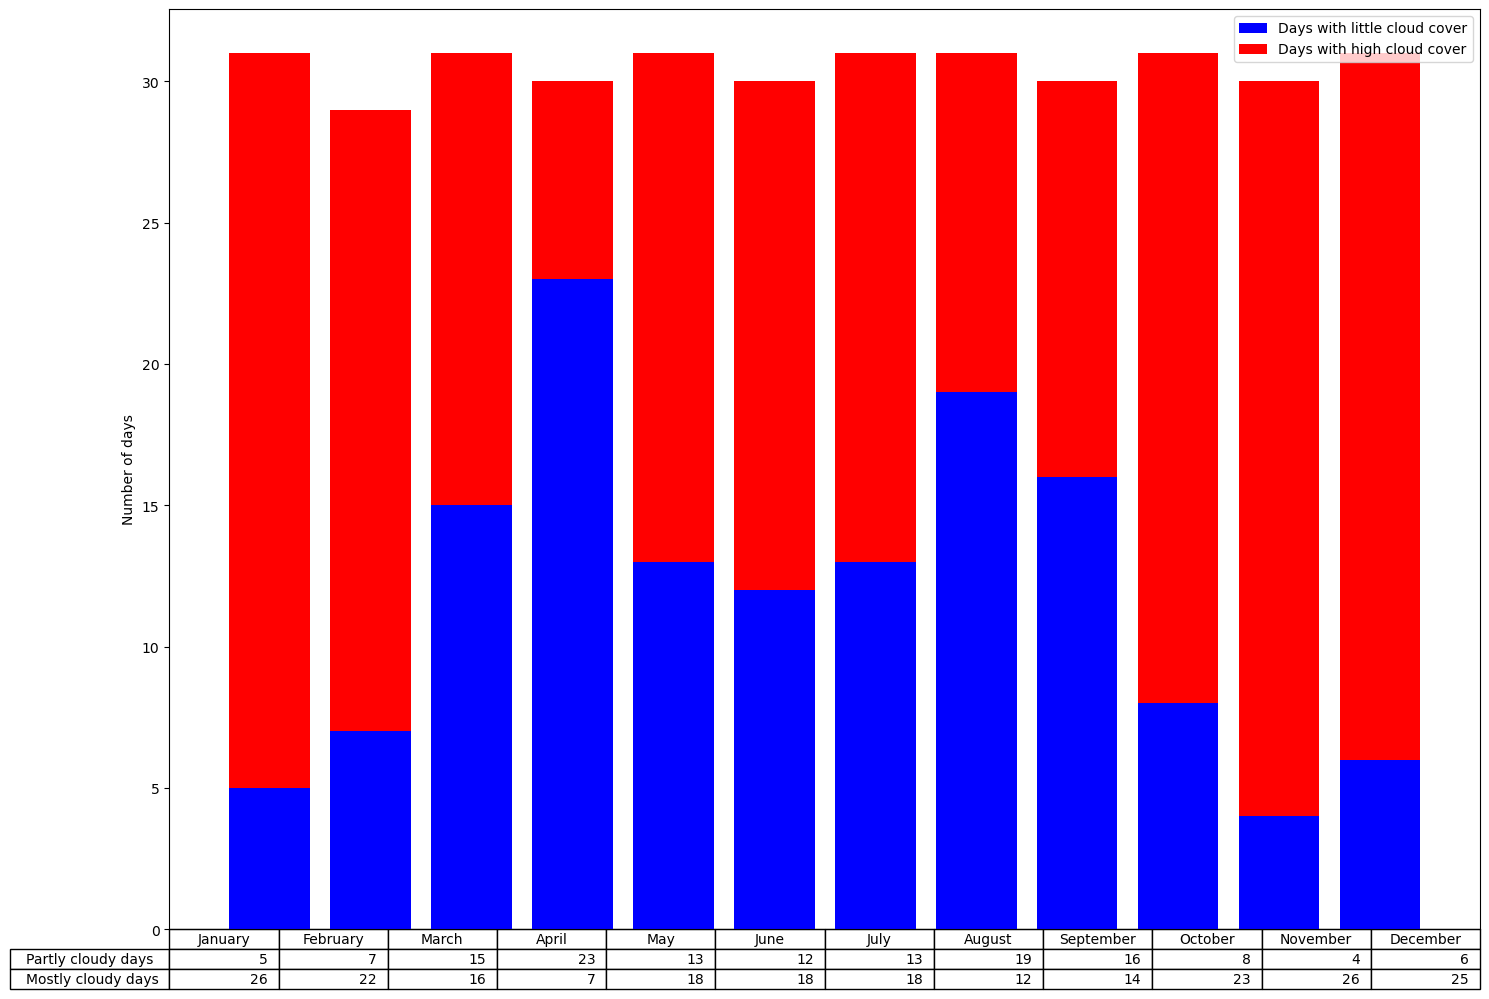

In [108]:
plt.figure(figsize=(15,10))
plt.bar(range(1, 13), s_nice_days_per_month, color='blue', label="Days with little cloud cover")
plt.bar(range(1, 13), s_bad_days_per_month, color='red', bottom=s_nice_days_per_month, label="Days with high cloud cover")
plt.ylabel('Number of days')
plt.legend()
plt.xticks([]) #transforming an empty list results in no interval on the X axis
 
plt.table(cellText=[s_nice_days_per_month.tolist(), s_bad_days_per_month.tolist()],
          rowLabels=['Partly cloudy days', 'Mostly cloudy days'],
          colLabels=months_names,
          loc='bottom')
plt.tight_layout()
plt.show()

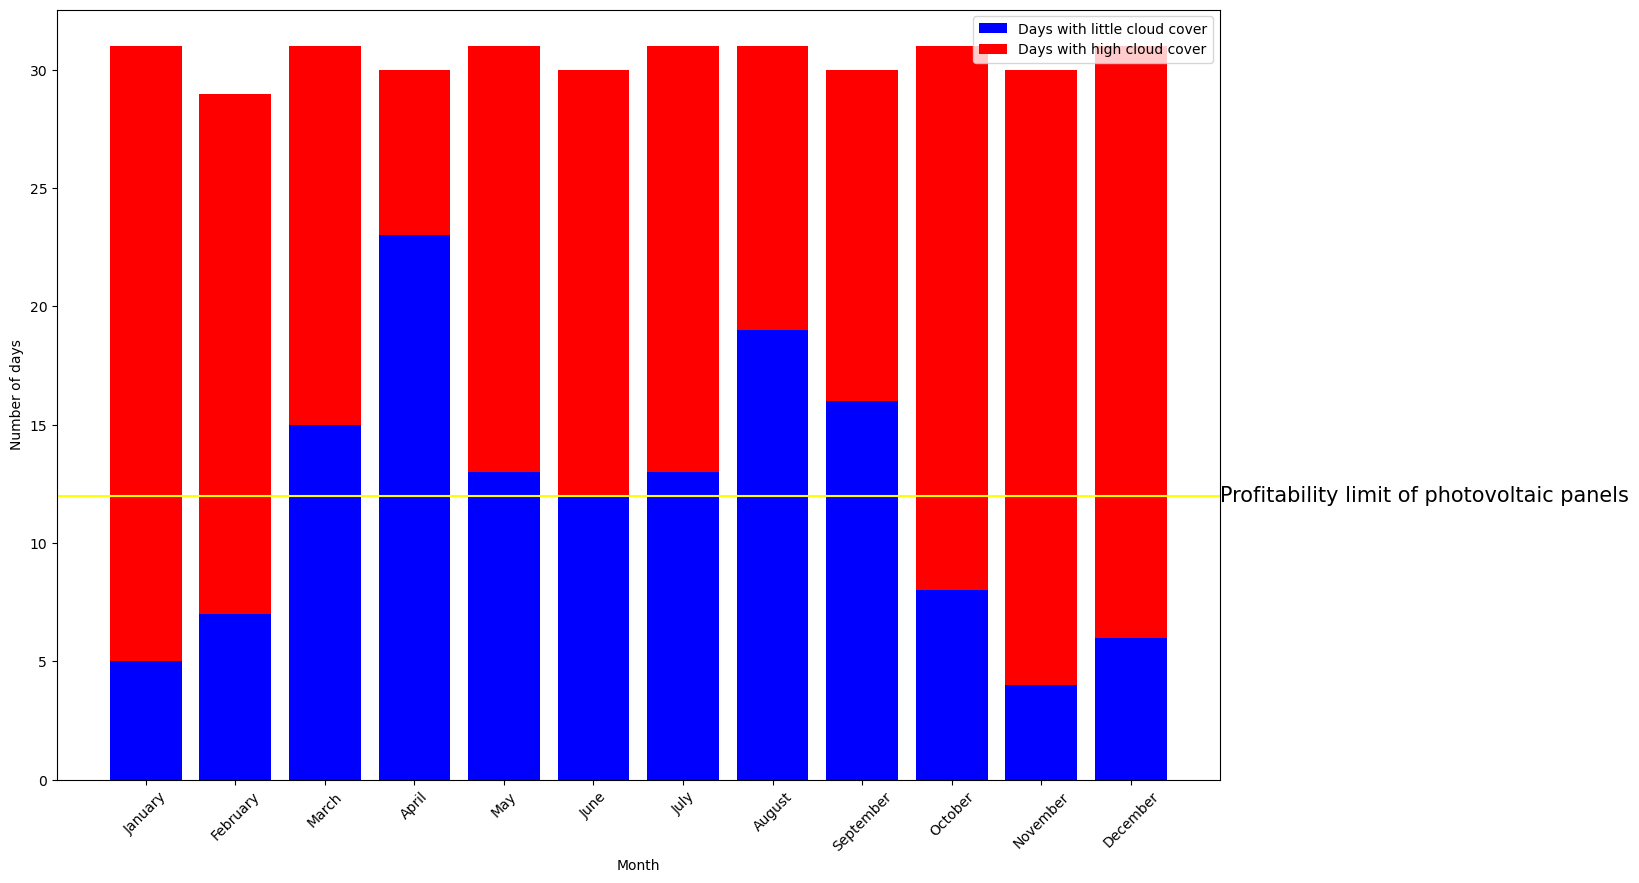

In [109]:
plt.figure(figsize=(15,10))
plt.bar(range(1, 13), s_nice_days_per_month, color='blue', label="Days with little cloud cover")
plt.bar(range(1, 13), s_bad_days_per_month, color='red', bottom=s_nice_days_per_month, label="Days with high cloud cover")
plt.xticks(range(1, 13), months_names, rotation=45)
plt.ylabel('Number of days')
plt.xlabel('Month')
plt.legend()
 
plt.axhline(12, color = "yellow")
plt.text(13, 12, "Profitability limit of photovoltaic panels", fontsize=15, va = 'center')
plt.show()

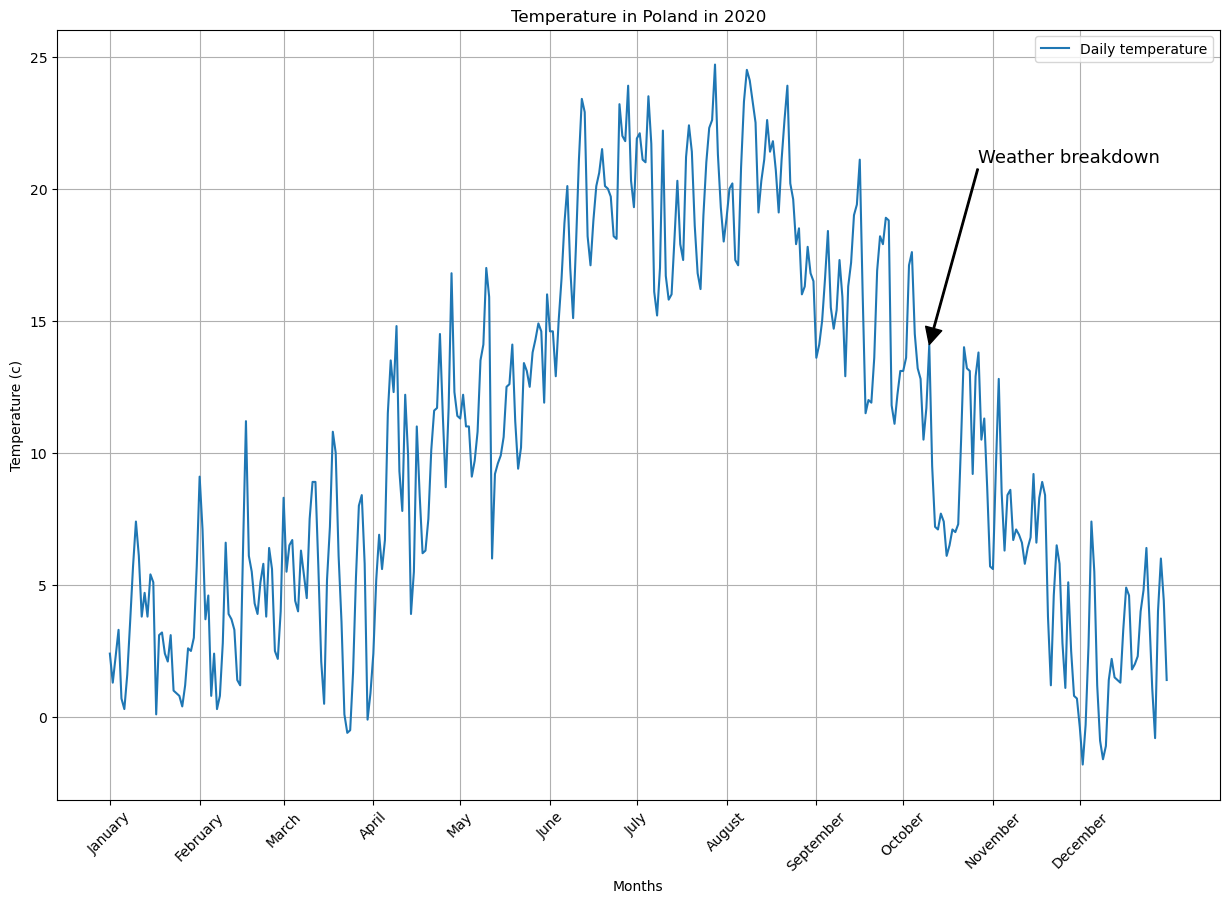

In [110]:
plt.figure(figsize=(15,10))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.xticks(months_change, months_names, rotation=45)
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
plt.title('Temperature in Poland in 2020')
plt.legend()
plt.grid()
 
plt.annotate('Weather breakdown', xy=(283, df['Average daily temperature'].iloc[283]), fontsize=13,
             xytext=(300, 21), arrowprops=dict(facecolor='black', width=1))
plt.show()

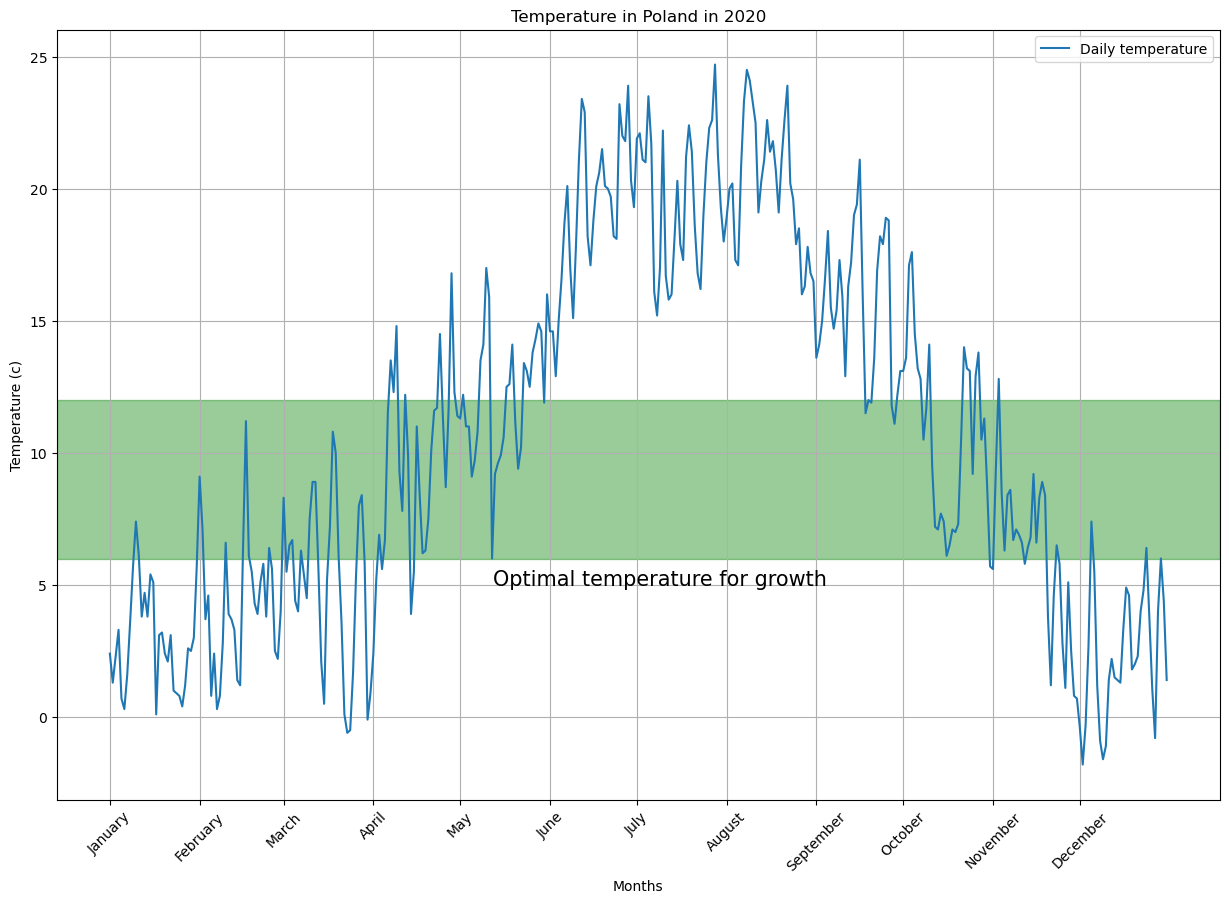

In [87]:
plt.figure(figsize=(15,10))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.xticks(months_change, months_names, rotation=45)
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
plt.title("Temperature in Poland in 2020")
plt.legend()
plt.grid()
 
plt.axhspan(6, 12, color='green', alpha=0.4)
plt.text(190, 5, "Optimal temperature for growth", fontsize=15, ha = 'center')
plt.show()

**3D charts**

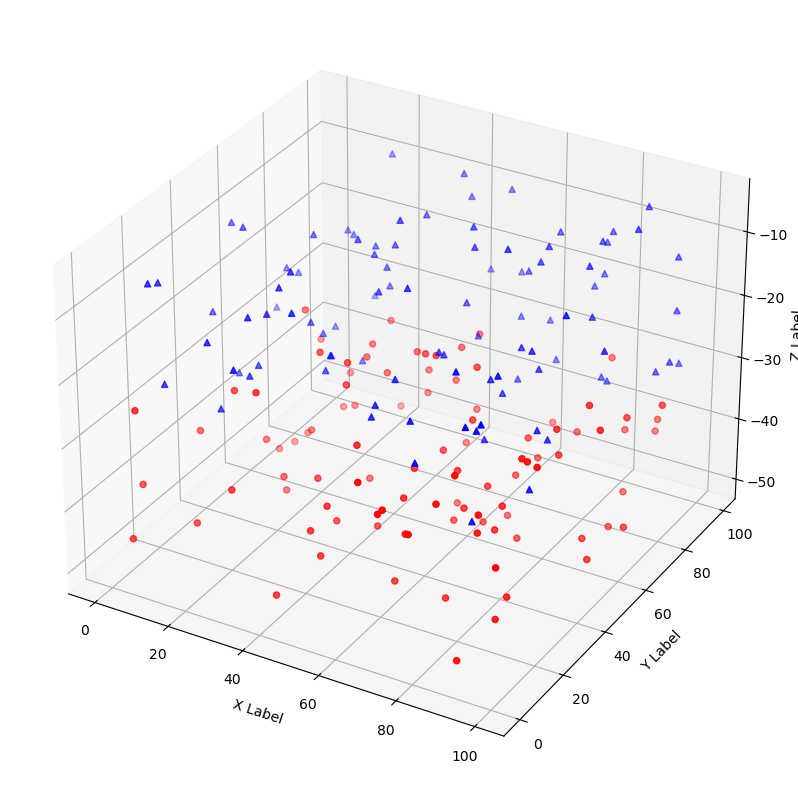

In [88]:
import random

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
n = 100

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = [random.randint(0, 100) for _ in range(n)]
    ys = [random.randint(0, 100) for _ in range(n)]
    zs = [random.randint(zlow, zhigh) for _ in range(n)]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()